<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/19_Fashion_MNIST_0~9%EA%B9%8C%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10가지의 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

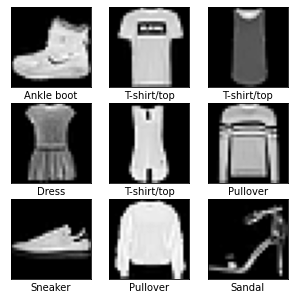

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


전처리 및 검증 데이터셋 만들기

In [4]:
# 값의 범위를  0~1사이로 만들기 -> 스케일링 -> minmax 알고리즘

x_train = x_train/255
x_test = x_test/255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
# 레이블(정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [6]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,
                                               test_size = 0.3,
                                               random_state=777)

첫 번째 모델 구성하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28,28)))
#Flatten(28,28)함수 -> (28*28) -> 1차원 784로 변환


first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))


첫 번째 모델 설정하기

In [10]:
first_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

첫 번째 모델 학습하기

In [11]:
first_history = first_model.fit(x_train,y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data = (x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1658 - accuracy: 0.6651 - val_loss: 0.0975 - val_accuracy: 0.8106
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0897 - accuracy: 0.8252 - val_loss: 0.0820 - val_accuracy: 0.8453
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0792 - accuracy: 0.8451 - val_loss: 0.0756 - val_accuracy: 0.8567
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.8552 - val_loss: 0.0729 - val_accuracy: 0.8586
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.8633 - val_loss: 0.0697 - val_accuracy: 0.8654
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.8671 - val_loss: 0.0673 - val_accuracy: 0.8703
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.8729 - val_loss: 0.0653 - val_accuracy: 0.8727
Epoch 

두 번째 모델 구성하기

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape = (28,28))) # (28,28) -> (28*28)
second_model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층을 추가합니다. (기존 모델보다 층 하나 더 추가)
second_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

second_model.compile(optimizer='adam', # 옵티마이저 : Adam
                     loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
                     metrics=['accuracy']) # 모니터링 할 평가지표 : add(정확도)

second_history = second_model.fit(x_train,y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data = (x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6185 - accuracy: 0.7890 - val_loss: 0.4409 - val_accuracy: 0.8452
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4145 - accuracy: 0.8517 - val_loss: 0.3853 - val_accuracy: 0.8620
Epoch 3/30
329/329 [==============================] - 1s 5ms/step - loss: 0.3668 - accuracy: 0.8657 - val_loss: 0.3482 - val_accuracy: 0.8762
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3456 - accuracy: 0.8737 - val_loss: 0.3508 - val_accuracy: 0.8716
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8797 - val_loss: 0.3440 - val_accuracy: 0.8748
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3053 - accuracy: 0.8884 - val_loss: 0.3818 - val_accuracy: 0.8613
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2900 - accuracy: 0.8923 - val_loss: 0.3199 - val_accuracy: 0.8858
Epoch 

학습결과 그려보기

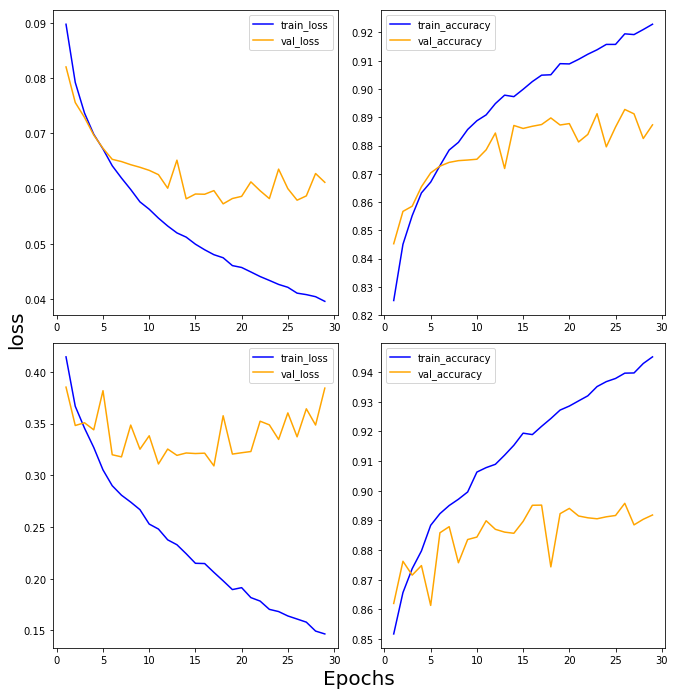

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)


모델 평가하기

In [23]:
print(first_model.evaluate(x_test,y_test))
print(second_model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.8771
[0.06714216619729996, 0.8770999908447266]
313/313 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8793
[0.444274365901947, 0.8792999982833862]


모델 예측해서 그려보기

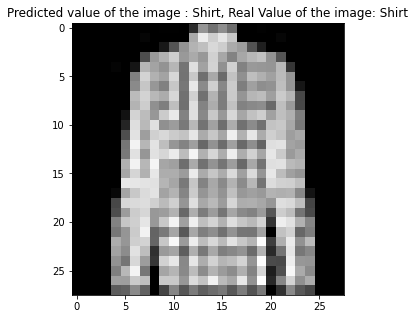

In [27]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()